In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [3]:
df = pd.read_csv('house_price.csv')
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [4]:
# Phát hiện dòng, cột chứa dữ liệu khuyết thiếu
df.isna()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
666,False,False,False,True,True,True,False,False,False,False,False,False
667,False,False,False,False,True,True,True,False,False,False,False,False
668,False,False,False,True,True,True,True,True,True,False,False,False
669,False,False,False,True,True,True,True,True,True,False,False,False


In [5]:
# Xóa bỏ dòng không có dữ liệu về giá
df1 = df.dropna(subset=['price'])
100*df1.shape[0]/df.shape[0]

91.95230998509687

In [11]:
df1.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [6]:
def most_fre(arg):
    return df1[arg].value_counts().idxmax()
most_fre('bedroom')

3.0

In [8]:
# Thay thế giá trị khuyết thiêu
values = {
          'land_certificate':'Không có thông tin', 
          'house_direction': most_fre('house_direction'), 
          'balcony_direction': most_fre('balcony_direction'),
          'toilet':most_fre('toilet'),
          'bedroom': most_fre('bedroom'),
          'floor': most_fre('floor')
         }
df2 = df1.fillna(value=values)
df2

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,Không có thông tin,dong-Nam,dong-Nam,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,dong-Nam,dong-Nam,4.0,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,Không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,Không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.016106,105.832157,mat pho


In [10]:
# Lọc thông tin nhà trong ngõ
df_in = df[df['property_type']=='trong ngo']
df_in

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,NaN,dong-Bac,Tay-Bac,NaN,NaN,8.0,21.017799,105.810572,trong ngo
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,NaN,5.0,7.0,21.020556,105.828657,trong ngo
446,96.0,10200.0,44325,So do,NaN,NaN,NaN,3.0,4.0,21.012310,105.828978,trong ngo
447,38.0,3900.0,44325,So do,NaN,NaN,4.0,3.0,5.0,21.006694,105.835635,trong ngo


In [49]:
# Tính toán đơn giá
df_in['Unit_price'] = (df_in['price'] / df_in['area'])
df_in

/tmp/ipykernel_32530/117211071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in['Unit_price'] = (df_in['price'] / df_in['area'])


,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,Unit_price
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294.000000
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73.684211
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177.419355
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111.538462
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo,98.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,NaN,dong-Bac,Tay-Bac,NaN,NaN,8.0,21.017799,105.810572,trong ngo,355.555556
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,NaN,5.0,7.0,21.020556,105.828657,trong ngo,272.413793
446,96.0,10200.0,44325,So do,NaN,NaN,NaN,3.0,4.0,21.012310,105.828978,trong ngo,106.250000
447,38.0,3900.0,44325,So do,NaN,NaN,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102.631579


<AxesSubplot:xlabel='Unit_price'>

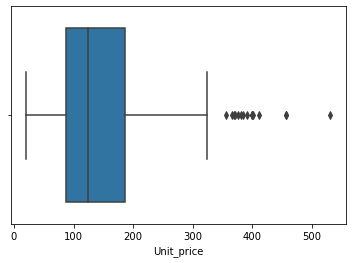

In [14]:
# Phát hiện giá trị ngoại lai
sns.boxplot(x = df_in['Unit_price'])


In [41]:
# Loại bỏ giá trị ngoại lai
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3-Q1
df3 = df_in[~((df_in<(Q1-1.5*IQR)) | (df_in > (Q3+1.5*IQR))).any(axis=1)]
type(df3)

/tmp/ipykernel_32530/585266453.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df2.quantile(0.25)
/tmp/ipykernel_32530/585266453.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df2.quantile(0.75)
/tmp/ipykernel_32530/585266453.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df3 = df_in[~((df_in<(Q1-1.5*IQR)) | (df_in > (Q3+1.5*IQR))).any(axis=1)]


pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Unit_price'>

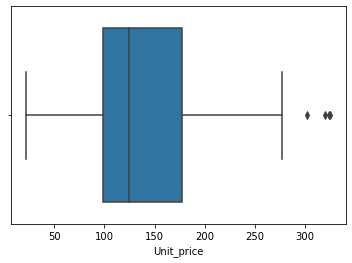

In [18]:
sns.boxplot(x = df3['Unit_price'])

In [28]:
df3['Unit_price']

3      111.538462
4       98.750000
20      21.818182
53      21.818182
55      70.000000
          ...    
436    128.571429
437    258.064516
438    200.000000
446    106.250000
447    102.631579
Name: Unit_price, Length: 240, dtype: float64

In [44]:
# Chuẩn hóa với minmax Scaling
scaler = MinMaxScaler()
mms = scaler.fit_transform(pd.DataFrame(df3['Unit_price']))
sns.kdeplot(data=mms)

In [35]:
# # Chuẩn hóa với robust Scaling
scaler = RobustScaler()
rbs =scaler.fit_transform(pd.DataFrame(df3['Unit_price']))
sns.kdeplot(rbs)

In [43]:
# Chuẩn hóa standard
scaler = StandardScaler()
sc = scaler.fit_transform(pd.DataFrame(df_in['Unit_price']))
sns.kdeplot(sc)